In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import plotly.express as px
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Diabetes Study File 10K Dec 14 2017.xlsx')
data.head()

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,...,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES
0,65,126.0,2013-06-11,31.000000,2013-06-11,1.66,2013-06-14,1.11,2013-06-14,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000255903,NaT,NaT,No
1,62,135.0,2014-06-19,25.846483,2014-10-17,2.49,2014-05-28,1.37,2014-05-28,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000256456,NaT,NaT,No
2,63,133.0,2012-07-31,30.900000,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,...,NaN,NaN,NaN,NaN,NaN,NaN,1001000000000054,NaT,NaT,No
3,51,136.0,2014-01-06,56.710775,2014-01-06,2.80,2014-01-14,1.94,2014-01-14,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000259496,NaT,NaT,No
4,40,123.0,2015-06-12,33.067867,2015-06-12,2.48,2015-06-24,1.17,2015-06-24,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000262094,NaT,NaT,No


In [3]:
print(data.shape)

(10000, 43)


In [41]:
# Check how many patients there are
data['Patient_ID'].unique().shape

1398

In [5]:
# Check types of variables
data.dtypes

Age_at_Exam                                         int64
sBP                                               float64
sBP_Date                                   datetime64[ns]
BMI                                               float64
BMI_Date                                   datetime64[ns]
LDL                                               float64
LDL_Date                                   datetime64[ns]
HDL                                               float64
HDL_Date                                   datetime64[ns]
A1c                                               float64
A1c_Date                                   datetime64[ns]
TG                                                float64
TG_Date                                    datetime64[ns]
FBS                                               float64
FBS_Date                                   datetime64[ns]
FBS>DM                                              int64
Total_Cholesterol                                 float64
Total_Choleste

In [6]:
# Count the number of missing values (NaN or None) in each column of the 'data' DataFrame
missing_value_counts = data.isnull().sum()
missing_value_counts

Age_at_Exam                                   0
sBP                                           4
sBP_Date                                      0
BMI                                           0
BMI_Date                                      0
LDL                                          61
LDL_Date                                      0
HDL                                          72
HDL_Date                                     64
A1c                                           0
A1c_Date                                      0
TG                                           53
TG_Date                                      42
FBS                                           0
FBS_Date                                      0
FBS>DM                                        0
Total_Cholesterol                           207
Total_Cholesterol_Lab_Date                  197
Diabetes                                      0
DM_OnsetDate                               4863
Depression                              

In [7]:
# Replace categorical values with numerical equivalents
data['DIABETES'].replace({'Yes' : 1, 'No' : 0}, inplace=True)
data['Sex'].replace({'Female' : 1, 'Male' : 0}, inplace=True)

# Create indicator for using hypertension meds/corticosteroid
data['Use_of_Hypertension_Medications'] = data['Hypertension_Medications'].notnull().astype('int')
data['Use_of_Corticosteroids'] = data['Corticosteroids'].notnull().astype('int')

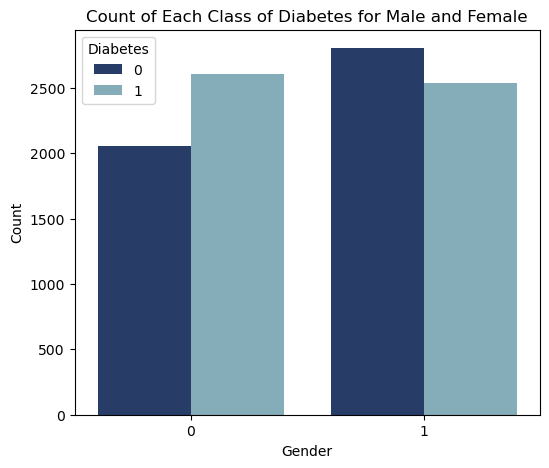

In [8]:
# Define a list of colors
colors = ['#1c3a73', '#7cb1c2']

# Create the grouped bar chart using seaborn's countplot function with specified colors
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='Sex', hue='DIABETES', palette=colors)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Each Class of Diabetes for Male and Female')
plt.legend(title='Diabetes')
plt.show()

In [9]:
print('Oldest individual in the dataset was of:', data['Age_at_Exam'].max(), 'Years')
print('Youngest individual in the dataset was of:', data['Age_at_Exam'].min(), 'Years')
print('Average age in the dataset:', data['Age_at_Exam'].mean(), 'Years')

Oldest individual in the dataset was of: 90 Years
Youngest individual in the dataset was of: 18 Years
Average age in the dataset: 63.1976 Years


In [10]:
# Create a subset with no date
df = data[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'Total_Cholesterol', 'Depression',
     'HTN', 'OA', 'COPD', 'Use_of_Hypertension_Medications', 'Use_of_Corticosteroids', 'Sex', 'DIABETES']]

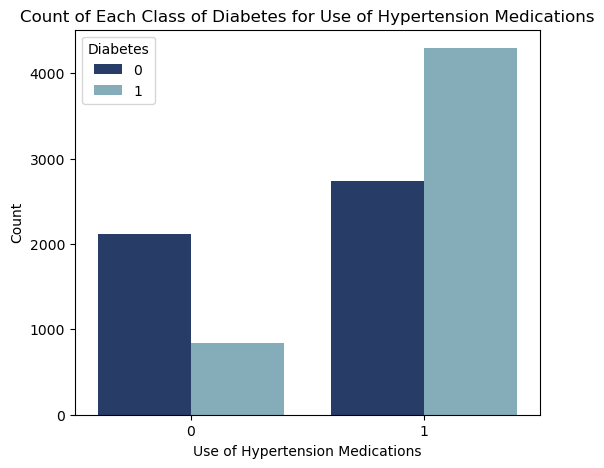

In [11]:
# Define a list of colors
colors = ['#1c3a73', '#7cb1c2']

# Create the grouped bar chart using seaborn's countplot function with specified colors
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Use_of_Hypertension_Medications', hue='DIABETES', palette=colors)

plt.xlabel('Use of Hypertension Medications')
plt.ylabel('Count')
plt.title('Count of Each Class of Diabetes for Use of Hypertension Medications')
plt.legend(title='Diabetes')
plt.show()

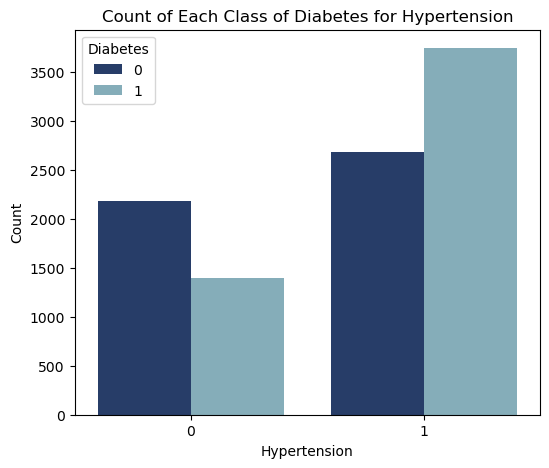

In [12]:
# Define a list of colors
colors = ['#1c3a73', '#7cb1c2']

# Create the grouped bar chart using seaborn's countplot function with specified colors
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='HTN', hue='DIABETES', palette=colors)

plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Count of Each Class of Diabetes for Hypertension')
plt.legend(title='Diabetes')
plt.show()

In [13]:
data_crosstab = pd.crosstab(data['HTN'], 
                            data['Use_of_Hypertension_Medications'],  
                               margins = False) 
print(data_crosstab) 

Use_of_Hypertension_Medications     0     1
HTN                                        
0                                2418  1158
1                                 544  5880


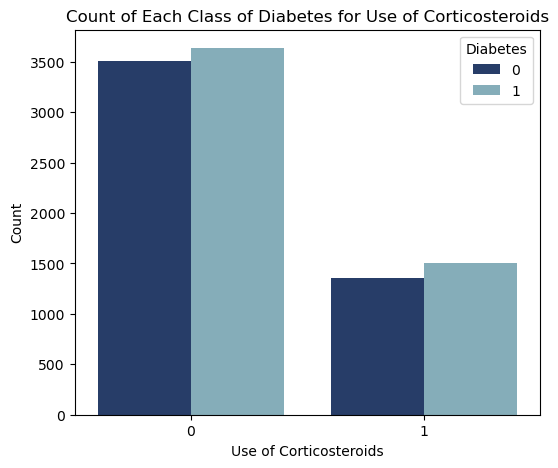

In [14]:
# Define a list of colors
colors = ['#1c3a73', '#7cb1c2']

# Create the grouped bar chart using seaborn's countplot function with specified colors
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Use_of_Corticosteroids', hue='DIABETES', palette=colors)

plt.xlabel('Use of Corticosteroids')
plt.ylabel('Count')
plt.title('Count of Each Class of Diabetes for Use of Corticosteroids')
plt.legend(title='Diabetes')
plt.show()

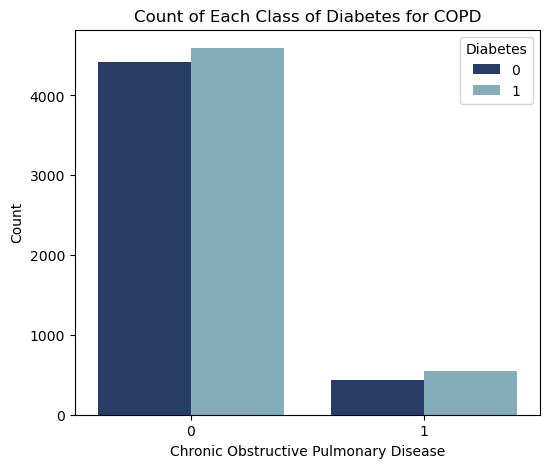

In [15]:
# Define a list of colors
colors = ['#1c3a73', '#7cb1c2']

# Create the grouped bar chart using seaborn's countplot function with specified colors
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='COPD', hue='DIABETES', palette=colors)

plt.xlabel('Chronic Obstructive Pulmonary Disease')
plt.ylabel('Count')
plt.title('Count of Each Class of Diabetes for COPD')
plt.legend(title='Diabetes')
plt.show()

In [16]:
# Imputation
df.isnull().sum()

Age_at_Exam                          0
sBP                                  4
BMI                                  0
LDL                                 61
HDL                                 72
A1c                                  0
TG                                  53
FBS                                  0
Total_Cholesterol                  207
Depression                           0
HTN                                  0
OA                                   0
COPD                                 0
Use_of_Hypertension_Medications      0
Use_of_Corticosteroids               0
Sex                                  0
DIABETES                             0
dtype: int64

In [17]:
# define features and outcome
X = df.drop(['DIABETES'], axis=1)
y = df[['DIABETES']]

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [18]:
# Imputation
imputer = IterativeImputer(max_iter=10, random_state=42)
X_train_filled_mice = imputer.fit_transform(X_train)
X_test_filled_mice = imputer.fit_transform(X_test)

In [19]:
# Check multicollinearity
# VIF dataframe
X_train_filled_mice_df = pd.DataFrame(X_train_filled_mice)
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_filled_mice_df.columns

  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_filled_mice_df.values, i)
                          for i in range(len(X_train_filled_mice_df.columns))]
  
print(vif_data)

    feature        VIF
0         0   1.393091
1         1   1.128468
2         2   1.180069
3         3  24.656329
4         4   5.174881
5         5   2.529902
6         6   5.357133
7         7   2.605488
8         8  33.420995
9         9   1.059318
10       10   1.738523
11       11   1.118800
12       12   1.051191
13       13   1.837441
14       14   1.056838
15       15   1.214929


In [20]:
# take a look at training X
for col in X.columns:
    print(col)
    
# LDL, A1c, and Total_Cholestrol have high VIF
# A1c strongly correlated with diabetes bc many doctors do not order it before a patient becomes diabetic (from variable description)

Age_at_Exam
sBP
BMI
LDL
HDL
A1c
TG
FBS
Total_Cholesterol
Depression
HTN
OA
COPD
Use_of_Hypertension_Medications
Use_of_Corticosteroids
Sex


In [21]:
# Define a function to compute various scores for model evaluation
def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

# Define a function to print the computed scores
def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

In [22]:
# Logistic regression feature selection

# Initialize a Logistic Regression model
model = LogisticRegression()

# Define a StratifiedKFold cross-validation
cv = StratifiedKFold(3)

# Initialize Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring='roc_auc',  # Specify the scoring metric (ROC AUC in this case)
    min_features_to_select=1,
)
rfecv.fit(X_train_filled_mice, Y_train)

# Print the optimal number of selected features
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 13


In [23]:
# which columns used and which wasn't
rfecv.support_

# Use_of_Corticosteroids, COPD, HTN not used

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True])

In [24]:
# features ranking low is better
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 4, 1])

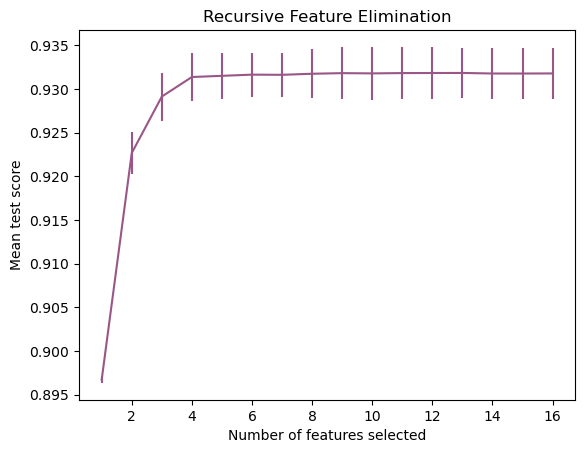

In [25]:
# Calculate the number of different feature selections tested
n_scores = len(rfecv.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination")

# Show the plot
plt.show()

In [26]:
# Select only the features that were chosen by RFECV
X_train = X_train_filled_mice[:, rfecv.support_]
X_test = X_test_filled_mice[:, rfecv.support_]

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions on the test and training sets
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, Y_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, Y_train)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

======== Training Set ==========
AUC :  0.8583138328470634
Accuracy :  0.858125
Confusion Matrix:
[[3394  647]
 [ 488 3471]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4041
           1       0.84      0.88      0.86      3959

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000

======== Test Set ==========
AUC :  0.8614884302689182
Accuracy :  0.861
Confusion Matrix:
[[863 162]
 [116 859]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1025
           1       0.84      0.88      0.86       975

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



In [27]:
# Random Forest

In [28]:
# RandomForestClassifier does not accept missing values encoded as NaN natively.
# Do not need normalization

X = df.drop(['DIABETES'], axis=1)
y = df[['DIABETES']]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation
imputer = IterativeImputer(max_iter=10, random_state=42)
X_train_filled_mice = imputer.fit_transform(X_train)
X_test_filled_mice = imputer.fit_transform(X_test)

Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

# Do not have severe class imbalance

print(f'The number of observations in the training set with diabetes is {sum(Y_train == 1)}')
print(f'The number of observations in the training set without diabetes is {sum(Y_train == 0)}')

# Define hyperparameters grid 
param_grid = {'n_estimators': [50, 100, 150],     
              'max_features': ['auto', 'sqrt', 'log2'],     
              'max_depth': [None, 10, 20, 30],     
              'min_samples_split': [2, 5, 10],     
              'min_samples_leaf': [1, 2, 4] }

# Initialize Random Forest classifier 
clf = RandomForestClassifier(oob_score=True, random_state=42)

# Use Grid Search to find the best hyperparameters 
grid_search = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1, verbose=2) 
grid_search.fit(X_train_filled_mice, Y_train)

The number of observations in the training set with diabetes is 4118
The number of observations in the training set without diabetes is 3882
Fitting 10 folds for each of 324 candidates, totalling 3240 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, m

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END max_depth=Non

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END max_depth=N

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, ma

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, ma

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, m

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_sa

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_sa

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_sa

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   0.0s
[CV] END max_depth=10, max_featu

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_sa

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=log2

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [29]:
# Print the best hyperparameters 
print("Best Hyperparameters:", grid_search.best_params_)

# Print the OOB score of the best model 
best_clf = grid_search.best_estimator_ 

print("OOB Score of Best Model:", best_clf.oob_score_)

# Storing and displaying the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)
results[results['rank_test_score'] == 1]

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
OOB Score of Best Model: 0.863375


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
37,1.018044,0.054639,0.013237,0.002718,None,sqrt,2,2,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",...,0.8625,0.85375,0.86,0.865,0.86375,0.8875,0.86875,0.8665,0.008584,1
64,1.007709,0.022645,0.013708,0.002652,None,log2,2,2,100,"{'max_depth': None, 'max_features': 'log2', 'm...",...,0.8625,0.85375,0.86,0.865,0.86375,0.8875,0.86875,0.8665,0.008584,1
280,1.049451,0.029582,0.014418,0.002236,30,sqrt,2,2,100,"{'max_depth': 30, 'max_features': 'sqrt', 'min...",...,0.8625,0.85375,0.86,0.865,0.86375,0.8875,0.86875,0.8665,0.008584,1
307,1.103536,0.083858,0.015469,0.006250,30,log2,2,2,100,"{'max_depth': 30, 'max_features': 'log2', 'min...",...,0.8625,0.85375,0.86,0.865,0.86375,0.8875,0.86875,0.8665,0.008584,1


In [30]:
# Updating the model's parameters with the best ones found from GridSearchCV
model = clf.set_params(**grid_search.best_params_)

# Retraining the model with the best parameters on the training dataset
model = model.fit(X_train_filled_mice, Y_train)

# Predicting on the training dataset and computing the accuracy
Y_pred_train = model.predict(X_train_filled_mice)
print(accuracy_score(Y_train, Y_pred_train))

# Predicting on the test dataset and computing the accuracy
Y_pred_test = model.predict(X_test_filled_mice)
print(accuracy_score(Y_test, Y_pred_test))

print(classification_report(Y_pred_train, Y_train))
print(classification_report(Y_pred_test, Y_test))

0.984875
0.869
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3907
           1       0.98      0.99      0.99      4093

    accuracy                           0.98      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.98      0.98      0.98      8000

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1023
           1       0.85      0.89      0.87       977

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [31]:
# XGBoost

X = df.drop(['DIABETES'], axis=1)
y = df[['DIABETES']]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation
imputer = IterativeImputer(max_iter=10, random_state=42)
X_train_filled_mice = imputer.fit_transform(X_train)
X_test_filled_mice = imputer.fit_transform(X_test)

Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

# Initializing the Gradient Boosting Classifier with specified parameters
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

# Defining the hyperparameters to be tuned using GridSearchCV
param_dist = {
    "n_estimators" : [100, 200],
    "max_depth" : [1, 3, 5],
    "min_samples_leaf" : [25, 50],
    "learning_rate" : [.1,  .2]
}

# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
skf = StratifiedKFold(n_splits=10)

# Setting up the GridSearchCV to find the best hyperparameters for the Gradient Boosting model
random_search = GridSearchCV(model, param_grid=param_dist, cv=skf)

# Fitting the GridSearchCV on the training data
# GradientBoostingClassifier does not accept missing values encoded as NaN natively. 
# For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively.
random_search.fit(X_train_filled_mice, Y_train)

# Storing and displaying the results of the grid search
results = pd.DataFrame(random_search.cv_results_)
results[results['rank_test_score'] == 1]

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END max_depth=20, max_features=sqr

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, 

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
4,0.922571,0.058637,0.001275,0.000104,0.1,3,25,100,"{'learning_rate': 0.1, 'max_depth': 3, 'min_sa...",0.86125,...,0.85375,0.85875,0.85375,0.8725,0.85500,0.87875,0.86125,0.862625,0.007934,1
7,1.790660,0.039055,0.001890,0.000081,0.1,3,50,200,"{'learning_rate': 0.1, 'max_depth': 3, 'min_sa...",0.86250,...,0.85875,0.86000,0.85000,0.8675,0.85375,0.88000,0.86375,0.862625,0.007755,1


In [32]:
random_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 25,
 'n_estimators': 100}

In [33]:
# Updating the model's parameters with the best ones found from GridSearchCV
model = model.set_params(**random_search.best_params_)

# Retraining the model with the best parameters on the training dataset
model = model.fit(X_train_filled_mice, Y_train)

# Predicting on the training dataset and computing the accuracy
Y_pred_train = model.predict(X_train_filled_mice)
print(accuracy_score(Y_train, Y_pred_train))

# Predicting on the test dataset and computing the accuracy
Y_pred_test = model.predict(X_test_filled_mice)
print(accuracy_score(Y_test, Y_pred_test))

print(classification_report(Y_pred_train, Y_train))
print(classification_report(Y_pred_test, Y_test))

0.873
0.8635
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4086
           1       0.85      0.90      0.87      3914

    accuracy                           0.87      8000
   macro avg       0.87      0.87      0.87      8000
weighted avg       0.87      0.87      0.87      8000

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1026
           1       0.84      0.88      0.86       974

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



In [34]:
# Depression vs no depression with XGBoost

# separate the data set into two sets
dep = df[df['Depression'] == 1]
no_dep = df[df['Depression'] == 0]

# check if all observations are covered
print(f'The number of observations with depression in this data set is {len(dep)}')
print(f'The number of observations without depression in this data set is {len(no_dep)}')

The number of observations with depression in this data set is 2122
The number of observations without depression in this data set is 7878


The number of observations in the training set with diabetes is 818
The number of observations in the training set without diabetes is 879
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.086448      0.014344         0.000399        0.000303   
2       0.079055      0.000825         0.000307        0.000033   

  param_learning_rate param_max_depth param_min_samples_leaf  \
0                 0.1               1                     25   
2                 0.1               1                     50   

  param_n_estimators                                             params  \
0                100  {'learning_rate': 0.1, 'max_depth': 1, 'min_sa...   
2                100  {'learning_rate': 0.1, 'max_depth': 1, 'min_sa...   

   split0_test_score  ...  split3_test_score  split4_test_score  \
0           0.852941  ...           0.870588           0.864706   
2           0.852941  ...           0.870588           0.864706   

   split5_test_score  split6_test_scor

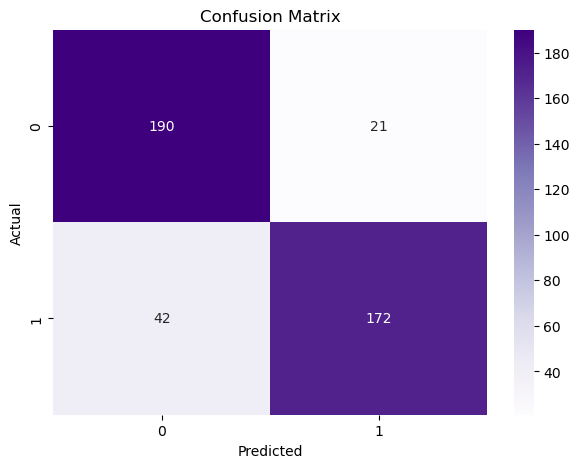

In [35]:
# run XGBoost on people with depression first

# define features and outcome
X = dep.drop(['DIABETES'], axis=1)
y = dep[['DIABETES']]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation
imputer = IterativeImputer(max_iter=10, random_state=42)
X_train_filled_mice = imputer.fit_transform(X_train)
X_test_filled_mice = imputer.fit_transform(X_test)

Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

# check class imbalance

print(f'The number of observations in the training set with diabetes is {sum(Y_train == 1)}')
print(f'The number of observations in the training set without diabetes is {sum(Y_train == 0)}')

# Initializing the Gradient Boosting Classifier with specified parameters
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

# Defining the hyperparameters to be tuned using GridSearchCV
param_dist = {
    "n_estimators" : [100, 200],
    "max_depth" : [1, 3, 5],
    "min_samples_leaf" : [25, 50],
    "learning_rate" : [.1,  .2]
}

# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
skf = StratifiedKFold(n_splits=10)

# Setting up the GridSearchCV to find the best hyperparameters for the Gradient Boosting model
random_search = GridSearchCV(model, param_grid=param_dist, cv=skf)

# Fitting the GridSearchCV on the training data
random_search.fit(X_train_filled_mice, Y_train)

# Storing and displaying the results of the grid search
results = pd.DataFrame(random_search.cv_results_)
results[results['rank_test_score'] == 1]

# Updating the model's parameters with the best ones found from GridSearchCV
model = model.set_params(**random_search.best_params_)

# Retraining the model with the best parameters on the training dataset
model = model.fit(X_train_filled_mice, Y_train)

# Predicting on the training dataset and computing the accuracy
Y_pred_train = model.predict(X_train_filled_mice)
print(accuracy_score(Y_train, Y_pred_train))

# Predicting on the test dataset and computing the accuracy
Y_pred_test = model.predict(X_test_filled_mice)
print(accuracy_score(Y_test, Y_pred_test))

print(classification_report(Y_pred_train, Y_train))
print(classification_report(Y_pred_test, Y_test))

# Get unique classes
classes = dep['DIABETES'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_test, Y_pred_test),
            cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
results[results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.086448,0.014344,0.000399,0.000303,0.1,1,25,100,"{'learning_rate': 0.1, 'max_depth': 1, 'min_sa...",0.852941,...,0.870588,0.864706,0.882353,0.876471,0.905325,0.857988,0.840237,0.862708,0.021057,1
2,0.079055,0.000825,0.000307,0.000033,0.1,1,50,100,"{'learning_rate': 0.1, 'max_depth': 1, 'min_sa...",0.852941,...,0.870588,0.864706,0.882353,0.876471,0.905325,0.857988,0.840237,0.862708,0.021057,1


The number of observations in the training set with diabetes is 3311
The number of observations in the training set without diabetes is 2991
0.8917803871786735
0.8546954314720813
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3103
           1       0.88      0.91      0.90      3199

    accuracy                           0.89      6302
   macro avg       0.89      0.89      0.89      6302
weighted avg       0.89      0.89      0.89      6302

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       819
           1       0.83      0.87      0.85       757

    accuracy                           0.85      1576
   macro avg       0.85      0.86      0.85      1576
weighted avg       0.86      0.85      0.85      1576



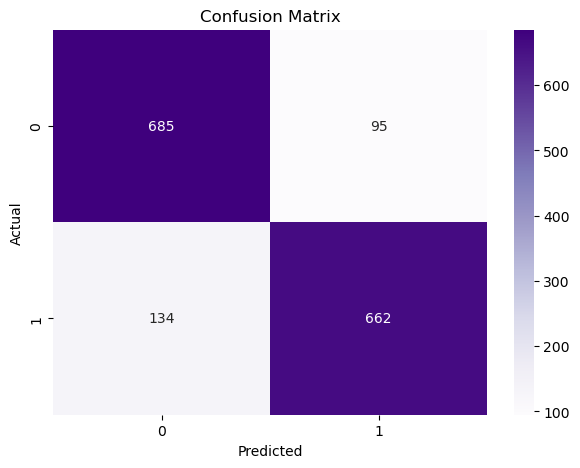

In [37]:
# run XGBoost on people without depression

# define features and outcome
X = no_dep.drop(['DIABETES'], axis=1)
y = no_dep[['DIABETES']]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation
imputer = IterativeImputer(max_iter=10, random_state=42)
X_train_filled_mice = imputer.fit_transform(X_train)
X_test_filled_mice = imputer.fit_transform(X_test)

Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

# check class imbalance

print(f'The number of observations in the training set with diabetes is {sum(Y_train == 1)}')
print(f'The number of observations in the training set without diabetes is {sum(Y_train == 0)}')

# Initializing the Gradient Boosting Classifier with specified parameters
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

# Defining the hyperparameters to be tuned using GridSearchCV
param_dist = {
    "n_estimators" : [100, 200],
    "max_depth" : [1, 3, 5],
    "min_samples_leaf" : [25, 50],
    "learning_rate" : [.1,  .2]
}

# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
skf = StratifiedKFold(n_splits=10)

# Setting up the GridSearchCV to find the best hyperparameters for the Gradient Boosting model
random_search = GridSearchCV(model, param_grid=param_dist, cv=skf)

# Fitting the GridSearchCV on the training data
random_search.fit(X_train_filled_mice, Y_train)

# Storing and displaying the results of the grid search
results = pd.DataFrame(random_search.cv_results_)
results[results['rank_test_score'] == 1]

# Updating the model's parameters with the best ones found from GridSearchCV
model = model.set_params(**random_search.best_params_)

# Retraining the model with the best parameters on the training dataset
model = model.fit(X_train_filled_mice, Y_train)

# Predicting on the training dataset and computing the accuracy
Y_pred_train = model.predict(X_train_filled_mice)
print(accuracy_score(Y_train, Y_pred_train))

# Predicting on the test dataset and computing the accuracy
Y_pred_test = model.predict(X_test_filled_mice)
print(accuracy_score(Y_test, Y_pred_test))

print(classification_report(Y_pred_train, Y_train))
print(classification_report(Y_pred_test, Y_test))

# Get unique classes
classes = no_dep['DIABETES'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_test, Y_pred_test),
            cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
results[results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
7,1.382182,0.007376,0.001556,0.000071,0.1,3,50,200,"{'learning_rate': 0.1, 'max_depth': 3, 'min_sa...",0.89065,...,0.868254,0.866667,0.857143,0.866667,0.836508,0.87619,0.847619,0.866861,0.015426,1
